In [76]:
!pip install matplotlib seaborn pandas liac-arff scipy

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
import arff
import pandas as pd

data = arff.load(open('../data/Melbourne_Airbnb', 'r', encoding="utf-8"))
df = pd.DataFrame(data['data'], columns=[attr[0] for attr in data['attributes']])
df.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,...,host_verifications_manual_offline,host_verifications_offline_government_id,host_verifications_selfie,host_verifications_reviews,host_verifications_identity_manual,host_verifications_sesame_offline,host_verifications_weibo,host_verifications_email,host_verifications_sent_id,host_verifications_phone
0,"""https://www.airbnb.com/rooms/25586695""",2.018120e+13,"""12/7/2018""","""Beach side, art deco flat in heart of St Kilda""","""A beautiful art deco flat right in the heart ...","""5 minutes walk to the beach. 1 minute walk t...","""A beautiful art deco flat right in the heart ...",None,None,None,...,False,False,False,True,False,False,False,True,False,True
1,"""https://www.airbnb.com/rooms/1057401""",2.018120e+13,"""12/7/2018""","""Modern Bayside Studio Apartment""","""Self contained modern apartment with its own ...","""We offer a self-contained modern apartment wi...","""Self contained modern apartment with its own ...","""The apartment is in a quiet residential neigh...",None,"""There is street parking available outside at ...",...,False,True,True,True,True,False,False,True,False,True
2,"""https://www.airbnb.com/rooms/24949385""",2.018120e+13,"""12/7/2018""","""Spacious Saint kilda home with a View""","""Short term Flatshare in the heart of St Kilda...",None,"""Short term Flatshare in the heart of St Kilda...",None,None,None,...,False,False,False,True,False,False,False,True,False,True
3,"""https://www.airbnb.com/rooms/20075093""",2.018120e+13,"""12/7/2018""","""Rewarding Richmond Location-Outstanding Apart...","""Welcome to my amazing apartment located in th...","""It will be a pleasure to host you in my fanta...","""Welcome to my amazing apartment located in th...","""Richmond is one of the most vibrant and diver...","""Please remove your shoes whilst inside, as th...","""To go directly into the CBD just walk 200 met...",...,False,True,False,True,False,False,False,True,False,False
4,"""https://www.airbnb.com/rooms/16275657""",2.018120e+13,"""12/7/2018""","""Close to the centre of Melbourne.""","""Beautiful 3 bedroomed double story townhouse ...","""Two living areas - use of both. 2 bedrooms. ...","""Beautiful 3 bedroomed double story townhouse ...","""Double story townhouse. Host has own space up...",None,"""Easy public transport system, close by. - tra...",...,False,False,False,True,False,False,False,False,False,True


# 1. Dataset Overwiew and Structure

In [79]:
print("="*60)
print("MELBOURNE AIRBNB DATASET - EXPLORATORY DATA ANALYSIS REPORT")
print("="*60)

print(f"\nDATASET DIMENSIONS:")
print(f"   • Rows: {df.shape[0]:,}")
print(f"   • Columns: {df.shape[1]:,}")
print(f"   • Total cells: {df.shape[0] * df.shape[1]:,}")

print(f"\nTARGET VARIABLE:")
print(f"   • Target: price_label")
print(f"   • Unique values: {df['price_label'].nunique()}")
print(f"   • Value range: {sorted(df['price_label'].unique())}")

print(f"\nDATA TYPES BREAKDOWN:")
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"   • {dtype}: {count} columns")

MELBOURNE AIRBNB DATASET - EXPLORATORY DATA ANALYSIS REPORT

DATASET DIMENSIONS:
   • Rows: 18,316
   • Columns: 103
   • Total cells: 1,886,548

TARGET VARIABLE:
   • Target: price_label
   • Unique values: 10
   • Value range: ['"0"', '"1"', '"2"', '"3"', '"4"', '"5"', '"6"', '"7"', '"8"', '"9"']

DATA TYPES BREAKDOWN:
   • object: 72 columns
   • float64: 18 columns
   • int64: 13 columns


## Conclusion
Objects has 3 data types, from which we are going to further analyse and detect text columns as well

# 2. Missing Data Analysis

In [80]:
# Columns with missing values
missing = df.isna().sum()
percent = (missing / len(df)) * 100
missing_table = pd.DataFrame({'Missing Values': missing, '% of Total': percent})
missing_cols = missing_table[missing_table['Missing Values'] > 0].index
missing_table.loc[missing_cols, 'Data Type'] = df[missing_cols].dtypes
missing_table_with_dtype = missing_table[missing_table['Missing Values'] > 0].sort_values('% of Total', ascending=False)
missing_table_with_dtype

,Missing Values,% of Total,Data Type
license,18297,99.896266,object
monthly_price,16810,91.777681,float64
weekly_price,16307,89.031448,float64
notes,9037,49.339375,object
host_about,7309,39.905001,object
neighborhood_overview,6791,37.076873,object
interaction,6665,36.388950,object
transit,6372,34.789255,object
host_neighborhood,6369,34.772876,object
house_rules,6276,34.265123,object


In [81]:
print("\n" + "="*50)
print("MISSING DATA ANALYSIS")
print("="*50)

# Calculate missing statistics
missing_stats = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes,
    'Unique_Values': [df[col].nunique() for col in df.columns]
})

# Filter only columns with missing values
missing_data = missing_stats[missing_stats['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

print(f"MISSING DATA SUMMARY:")
print(f"   • Columns with missing data: {len(missing_data)}/{len(df.columns)}")
print(f"   • Total missing values: {df.isnull().sum().sum():,}")
print(f"   • Percentage of total cells missing: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

print(f"\nSEVERELY MISSING COLUMNS (>50% missing):")
severe_missing = missing_data[missing_data['Missing_Percentage'] > 50]
for idx, row in severe_missing.head(10).iterrows():
    print(f"   • {row['Column']}: {row['Missing_Percentage']:.1f}% missing ({row['Missing_Count']:,} values)")

print(f"\nMODERATELY MISSING COLUMNS (10-50% missing):")
moderate_missing = missing_data[(missing_data['Missing_Percentage'] >= 10) & (missing_data['Missing_Percentage'] <= 50)]
for idx, row in moderate_missing.head(10).iterrows():
    print(f"   • {row['Column']}: {row['Missing_Percentage']:.1f}% missing ({row['Missing_Count']:,} values)")



MISSING DATA ANALYSIS
MISSING DATA SUMMARY:
   • Columns with missing data: 44/103
   • Total missing values: 183,821
   • Percentage of total cells missing: 9.74%

SEVERELY MISSING COLUMNS (>50% missing):
   • license: 99.9% missing (18,297 values)
   • monthly_price: 91.8% missing (16,810 values)
   • weekly_price: 89.0% missing (16,307 values)

MODERATELY MISSING COLUMNS (10-50% missing):
   • notes: 49.3% missing (9,037 values)
   • host_about: 39.9% missing (7,309 values)
   • neighborhood_overview: 37.1% missing (6,791 values)
   • interaction: 36.4% missing (6,665 values)
   • transit: 34.8% missing (6,372 values)
   • host_neighborhood: 34.8% missing (6,369 values)
   • house_rules: 34.3% missing (6,276 values)
   • access: 33.8% missing (6,191 values)
   • security_deposit: 32.6% missing (5,962 values)
   • host_response_rate: 31.7% missing (5,807 values)


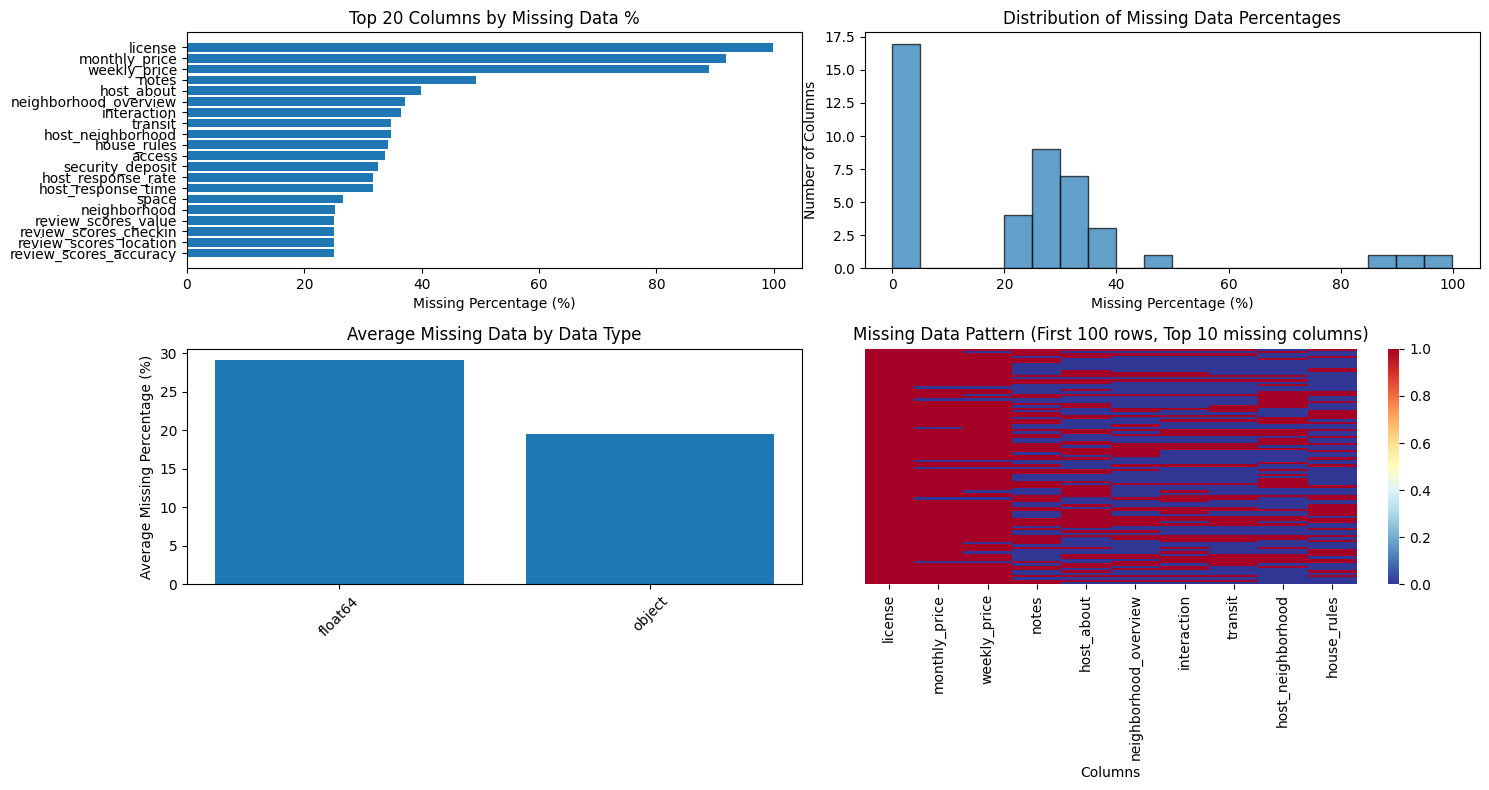

In [82]:
plt.figure(figsize=(15, 8))

# Top 20 columns with missing data
plt.subplot(2, 2, 1)
top_missing = missing_data.head(20)
plt.barh(range(len(top_missing)), top_missing['Missing_Percentage'])
plt.yticks(range(len(top_missing)), top_missing['Column'])
plt.xlabel('Missing Percentage (%)')
plt.title('Top 20 Columns by Missing Data %')
plt.gca().invert_yaxis()

# Missing data distribution
plt.subplot(2, 2, 2)
plt.hist(missing_data['Missing_Percentage'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Missing Percentage (%)')
plt.ylabel('Number of Columns')
plt.title('Distribution of Missing Data Percentages')

# Missing data by data type
plt.subplot(2, 2, 3)
missing_by_type = missing_data.groupby('Data_Type')['Missing_Percentage'].mean()
plt.bar(range(len(missing_by_type)), missing_by_type.values)
plt.xticks(range(len(missing_by_type)), missing_by_type.index, rotation=45)
plt.ylabel('Average Missing Percentage (%)')
plt.title('Average Missing Data by Data Type')

# Missing data pattern (sample)
plt.subplot(2, 2, 4)
sample_cols = missing_data.head(10)['Column'].tolist()
missing_pattern = df[sample_cols].isnull().astype(int)
sns.heatmap(missing_pattern.iloc[:100], cbar=True, yticklabels=False, cmap='RdYlBu_r')
plt.title('Missing Data Pattern (First 100 rows, Top 10 missing columns)')
plt.xlabel('Columns')

plt.tight_layout()
plt.show()

## Conclusion
We should eliminate some columns because they neither contribute nor relate to out target variable.

For example, look at the top 3 columns that has missing values, they are absolutely of no use, 99% of their data is empty

# 3. Target Variable Analysis


TARGET VARIABLE ANALYSIS
PRICE LABEL DISTRIBUTION:
   • Label "0": 1,524 listings (8.3%)
   • Label "1": 1,672 listings (9.1%)
   • Label "2": 1,753 listings (9.6%)
   • Label "3": 1,587 listings (8.7%)
   • Label "4": 871 listings (4.8%)
   • Label "5": 2,279 listings (12.4%)
   • Label "6": 1,934 listings (10.6%)
   • Label "7": 1,626 listings (8.9%)
   • Label "8": 1,731 listings (9.5%)
   • Label "9": 3,339 listings (18.2%)


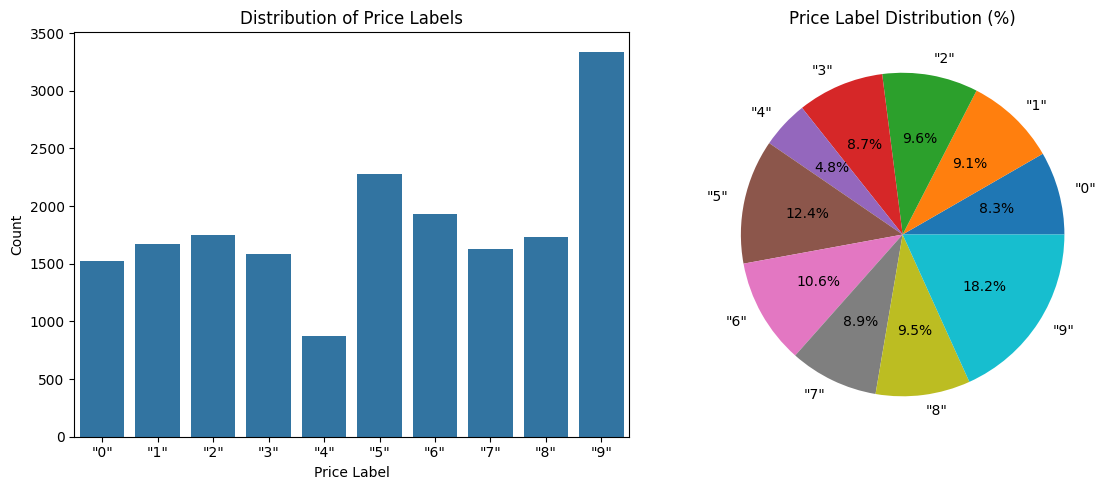


CLASS BALANCE ANALYSIS:
   • Most frequent class: 3,339 instances
   • Least frequent class: 871 instances
   • Imbalance ratio: 3.8:1
   •  Moderate class imbalance present


In [83]:
print("\n" + "="*50)
print("TARGET VARIABLE ANALYSIS")
print("="*50)

# Target distribution
target_dist = df['price_label'].value_counts().sort_index()
print(f"PRICE LABEL DISTRIBUTION:")
for label, count in target_dist.items():
    percentage = (count / len(df)) * 100
    print(f"   • Label {label}: {count:,} listings ({percentage:.1f}%)")

# Visualize target distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='price_label', order=sorted(df['price_label'].unique()))
plt.title('Distribution of Price Labels')
plt.xlabel('Price Label')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
target_dist.plot(kind='pie', autopct='%1.1f%%')
plt.title('Price Label Distribution (%)')
plt.ylabel('')

plt.tight_layout()
plt.show()

# Check for class imbalance
print(f"\nCLASS BALANCE ANALYSIS:")
max_class = target_dist.max()
min_class = target_dist.min()
imbalance_ratio = max_class / min_class
print(f"   • Most frequent class: {max_class:,} instances")
print(f"   • Least frequent class: {min_class:,} instances")
print(f"   • Imbalance ratio: {imbalance_ratio:.1f}:1")

if imbalance_ratio > 5:
    print("   •  SIGNIFICANT CLASS IMBALANCE DETECTED!")
elif imbalance_ratio > 2:
    print("   •  Moderate class imbalance present")
else:
    print("   • Classes are relatively balanced")

## Conclusion
We should change the notation of price_label categories from "string 0-9" to something actually verbose

# 4. Column Type Analysis

In [84]:
print("\n" + "="*50)
print("COLUMN CATEGORIZATION ANALYSIS")
print("="*50)

# Categorize columns systematically
def analyze_column_types(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    object_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    # Remove target from analysis
    if 'price_label' in numeric_cols:
        numeric_cols.remove('price_label')
    if 'price_label' in object_cols:
        object_cols.remove('price_label')
    
    text_cols = []
    categorical_cols = []
    high_cardinality_cols = []
    
    for col in object_cols:
        unique_count = df[col].nunique()
        total_count = len(df[col].dropna())
        unique_ratio = unique_count / total_count if total_count > 0 else 0
        
        if unique_ratio > 0.8 or unique_count > 1000:  # Likely text/identifier
            text_cols.append(col)
        elif unique_count > 50:  # High cardinality categorical
            high_cardinality_cols.append(col)
        else:  # Regular categorical
            categorical_cols.append(col)
    
    return {
        'numeric': numeric_cols,
        'categorical': categorical_cols,
        'high_cardinality': high_cardinality_cols,
        'text': text_cols
    }

column_analysis = analyze_column_types(df)

print(f" COLUMN TYPE BREAKDOWN:")
for col_type, cols in column_analysis.items():
    print(f"   • {col_type.replace('_', ' ').title()}: {len(cols)} columns")

print(f"\n DETAILED BREAKDOWN:")
for col_type, cols in column_analysis.items():
    print(f"\n{col_type.replace('_', ' ').title()} Columns ({len(cols)}):")
    for i, col in enumerate(cols[:10], 1):  # Show first 10
        unique_count = df[col].nunique()
        missing_pct = (df[col].isnull().sum() / len(df)) * 100
        print(f"   {i:2d}. {col:<30} | Unique: {unique_count:>6} | Missing: {missing_pct:>5.1f}%")
    if len(cols) > 10:
        print(f"   ... and {len(cols) - 10} more columns")


COLUMN CATEGORIZATION ANALYSIS
 COLUMN TYPE BREAKDOWN:
   • Numeric: 31 columns
   • Categorical: 40 columns
   • High Cardinality: 10 columns
   • Text: 21 columns

 DETAILED BREAKDOWN:

Numeric Columns (31):
    1. scrape_id                      | Unique:      1 | Missing:   0.0%
    2. host_id                        | Unique:  12426 | Missing:   0.0%
    3. latitude                       | Unique:  18304 | Missing:   0.0%
    4. longitude                      | Unique:  18191 | Missing:   0.0%
    5. accommodates                   | Unique:     16 | Missing:   0.0%
    6. bathrooms                      | Unique:     20 | Missing:   0.1%
    7. bedrooms                       | Unique:     13 | Missing:   0.0%
    8. beds                           | Unique:     20 | Missing:   0.2%
    9. price                          | Unique:    425 | Missing:   0.0%
   10. weekly_price                   | Unique:    529 | Missing:  89.0%
   ... and 21 more columns

Categorical Columns (40):
    1

# 5. Numeric Value Analysis


NUMERIC VARIABLES ANALYSIS
 NUMERIC SUMMARY STATISTICS:
          scrape_id       host_id  latitude  longitude  accommodates  \
count  1.831600e+04  1.831600e+04  18316.00   18316.00      18316.00   
mean   2.018120e+13  7.092650e+07    -37.83     145.01          3.43   
std    0.000000e+00  6.474866e+07      0.07       0.13          2.23   
min    2.018120e+13  1.274000e+04    -38.22     144.48          1.00   
25%    2.018120e+13  1.747060e+07    -37.85     144.96          2.00   
50%    2.018120e+13  4.801411e+07    -37.82     144.98          2.00   
75%    2.018120e+13  1.142029e+08    -37.80     145.01          4.00   
max    2.018120e+13  2.294705e+08    -37.48     145.83         16.00   

       bathrooms  bedrooms      beds     price  weekly_price  ...  \
count   18305.00  18311.00  18288.00  18316.00       2009.00  ...   
mean        1.29      1.53      1.99    147.60        917.91  ...   
std         0.58      0.95      1.54    191.95        862.17  ...   
min         0.00  

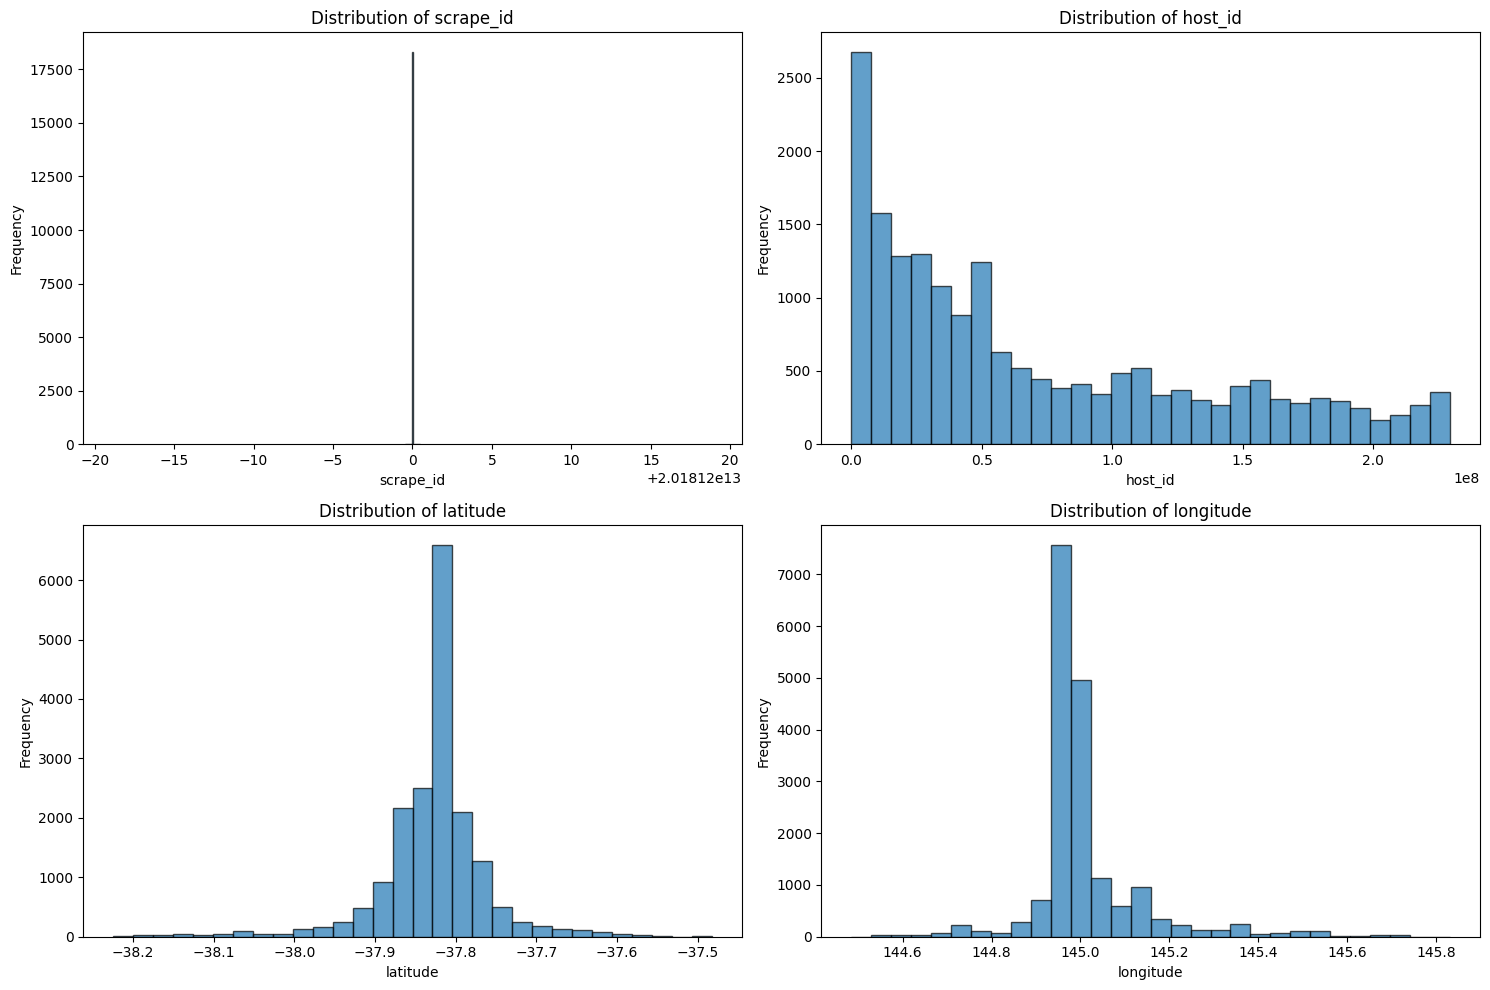

In [85]:
print("\n" + "="*50)
print("NUMERIC VARIABLES ANALYSIS")
print("="*50)

numeric_cols = column_analysis['numeric']
if len(numeric_cols) > 0:
    numeric_df = df[numeric_cols]
    
    print(f" NUMERIC SUMMARY STATISTICS:")
    print(numeric_df.describe().round(2))
    
    # Identify potential issues
    print(f"\n POTENTIAL DATA QUALITY ISSUES:")
    
    for col in numeric_cols[:10]:  # Analyze first 10 numeric columns
        col_data = df[col].dropna()
        if len(col_data) > 0:
            has_negatives = (col_data < 0).any()
            has_zeros = (col_data == 0).sum()
            has_outliers = len(col_data[(col_data < col_data.quantile(0.01)) | (col_data > col_data.quantile(0.99))])
            
            issues = []
            if has_negatives:
                issues.append("negative values")
            if has_zeros > len(col_data) * 0.1:
                issues.append(f"many zeros ({has_zeros})")
            if has_outliers > len(col_data) * 0.05:
                issues.append(f"potential outliers ({has_outliers})")
            
            if issues:
                print(f"   • {col}: {', '.join(issues)}")
    
    # Plot distributions for key numeric variables
    if len(numeric_cols) >= 4:
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        axes = axes.ravel()
        
        for i, col in enumerate(numeric_cols[:4]):
            col_data = df[col].dropna()
            if len(col_data) > 0:
                axes[i].hist(col_data, bins=30, alpha=0.7, edgecolor='black')
                axes[i].set_title(f'Distribution of {col}')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Frequency')
        
        plt.tight_layout()
        plt.show()

# 6. Categorical Variables Analysis


CATEGORICAL VARIABLES ANALYSIS
 CATEGORICAL VARIABLES SUMMARY:
   • Regular categorical: 40 columns
   • High cardinality: 10 columns

  REGULAR CATEGORICAL COLUMNS:

   last_scraped:
      • Unique values: 2
      • Most frequent: '"12/7/2018"' (18305 times)
      • 2nd most frequent: '"12/8/2018"' (11 times)

   host_response_time:
      • Unique values: 4
      • Most frequent: '"within an hour"' (9280 times)
      • 2nd most frequent: '"within a few hours"' (1705 times)

   host_is_superhost:
      • Unique values: 2
      • Most frequent: '"f"' (13985 times)
      • 2nd most frequent: '"t"' (4328 times)

   host_has_profile_pic:
      • Unique values: 2
      • Most frequent: '"t"' (18277 times)
      • 2nd most frequent: '"f"' (36 times)

   host_identity_verified:
      • Unique values: 2
      • Most frequent: '"f"' (11413 times)
      • 2nd most frequent: '"t"' (6900 times)

   city:
      • Unique values: 30
      • Most frequent: '"Melbourne"' (5891 times)
      • 2nd most 

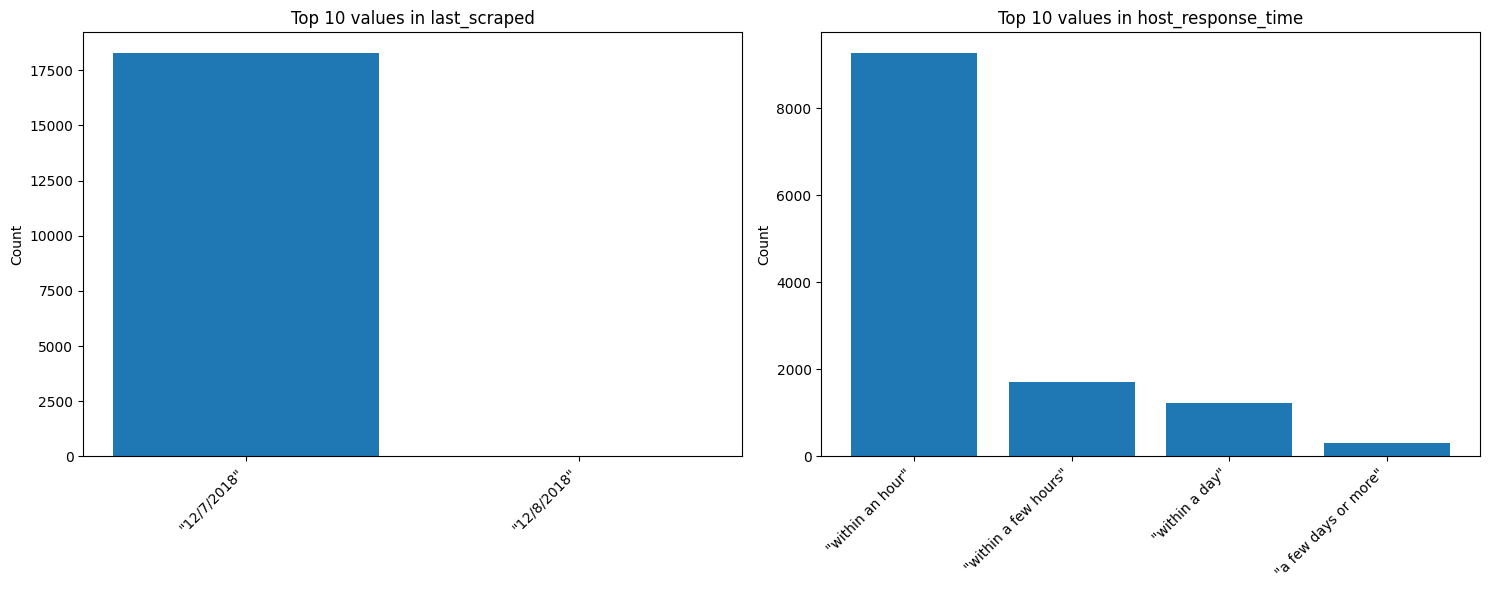

In [86]:
print("\n" + "="*50)
print("CATEGORICAL VARIABLES ANALYSIS")
print("="*50)

categorical_cols = column_analysis['categorical']
high_cardinality_cols = column_analysis['high_cardinality']

print(f" CATEGORICAL VARIABLES SUMMARY:")
print(f"   • Regular categorical: {len(categorical_cols)} columns")
print(f"   • High cardinality: {len(high_cardinality_cols)} columns")

# Analyze regular categorical columns
if len(categorical_cols) > 0:
    print(f"\n  REGULAR CATEGORICAL COLUMNS:")
    for col in categorical_cols[:10]:
        value_counts = df[col].value_counts()
        print(f"\n   {col}:")
        print(f"      • Unique values: {len(value_counts)}")
        print(f"      • Most frequent: '{value_counts.index[0]}' ({value_counts.iloc[0]} times)")
        if len(value_counts) > 1:
            print(f"      • 2nd most frequent: '{value_counts.index[1]}' ({value_counts.iloc[1]} times)")

# Analyze high cardinality columns
if len(high_cardinality_cols) > 0:
    print(f"\n HIGH CARDINALITY COLUMNS:")
    for col in high_cardinality_cols[:5]:
        unique_count = df[col].nunique()
        total_count = len(df[col].dropna())
        print(f"   • {col}: {unique_count} unique values out of {total_count} non-null entries")

# Visualize some categorical variables
if len(categorical_cols) >= 2:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot top categorical variables
    for i, col in enumerate(categorical_cols[:2]):
        value_counts = df[col].value_counts().head(10)
        axes[i].bar(range(len(value_counts)), value_counts.values)
        axes[i].set_xticks(range(len(value_counts)))
        axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
        axes[i].set_title(f'Top 10 values in {col}')
        axes[i].set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()


Let us deep dive into the categorical analysis a little bit more, the reason why I am doing this is because we have text columns in this dataset as well, currently the text columns are being included under categorical columns and are being shown as high cardinality columns, mainly because each text is different and when we try to find the number of unique categories in a text column, all the elements will be unique and thereore n number of unique categories instead of normal categorical definition

# 7. Text Columns Analysis

In [87]:
text_cols = []
categorical_cols = []

for col in df.select_dtypes(include='object').columns:
    n_unique = df[col].nunique()
    n_total = len(df[col])
    
    # If almost all values are unique, treat as text
    if n_unique / n_total > 0.95:  # 95% unique threshold
        text_cols.append(col)
    else:
        categorical_cols.append(col)

print("\n" + "="*50)
print("TEXT COLUMNS ANALYSIS")
print("="*50)
print(f"Text Columns ({len(text_cols)}):")
for col in text_cols:
    print(f"   • {col}")


TEXT COLUMNS ANALYSIS
Text Columns (5):
   • listing_url
   • name
   • description
   • picture_url
   • amenities


# 8. Data Quality Summary

In [88]:
print("\n" + "="*60)
print("DATA QUALITY ASSESSMENT & RECOMMENDATIONS")
print("="*60)

# Calculate overall data quality metrics
total_cells = df.shape[0] * df.shape[1]
missing_cells = df.isnull().sum().sum()
completeness = ((total_cells - missing_cells) / total_cells) * 100

print(f" OVERALL DATA QUALITY METRICS:")
print(f"   • Data Completeness: {completeness:.1f}%")
print(f"   • Missing Data Density: {(missing_cells / total_cells) * 100:.1f}%")

# Categorize columns by data quality
excellent_cols = missing_data[missing_data['Missing_Percentage'] < 5]
good_cols = missing_data[(missing_data['Missing_Percentage'] >= 5) & (missing_data['Missing_Percentage'] < 20)]
poor_cols = missing_data[(missing_data['Missing_Percentage'] >= 20) & (missing_data['Missing_Percentage'] < 50)]
critical_cols = missing_data[missing_data['Missing_Percentage'] >= 50]

print(f"\n COLUMNS BY DATA QUALITY:")
print(f"   • Excellent (< 5% missing): {len(excellent_cols)} columns")
print(f"   • Good (5-20% missing): {len(good_cols)} columns") 
print(f"   • Poor (20-50% missing): {len(poor_cols)} columns")
print(f"   • Critical (> 50% missing): {len(critical_cols)} columns")


DATA QUALITY ASSESSMENT & RECOMMENDATIONS
 OVERALL DATA QUALITY METRICS:
   • Data Completeness: 90.3%
   • Missing Data Density: 9.7%

 COLUMNS BY DATA QUALITY:
   • Excellent (< 5% missing): 17 columns
   • Good (5-20% missing): 0 columns
   • Poor (20-50% missing): 24 columns
   • Critical (> 50% missing): 3 columns


## My Thoughts :

1. We should change the name of labels of target variables from string numerics to verbose labels.
2. We should remove the columns with 90-80% empty values.
3. Filter out unnecessary columns such as IDs and URLs, they do not contribute in model building

--------------------------------------------------------------------------------------

# Additional report graphs

In [89]:
df["price_label_ordinal"] = df["price_label"].str.replace('"','').astype(int) 
df["latitude"] = df["latitude"].astype(float)
df["longitude"] = df["longitude"].astype(float)

In [90]:
df.select_dtypes(include=['number']).corr()

,scrape_id,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,weekly_price,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,price_label_ordinal
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,NaN,1.000000,-0.014892,0.005400,0.021218,0.014539,0.011379,0.026172,-0.008888,-0.079650,...,-0.091522,-0.085507,-0.062176,-0.116177,-0.106973,-0.050688,-0.058238,-0.084928,0.136630,-0.036329
latitude,NaN,-0.014892,1.000000,-0.139543,-0.002279,-0.035796,-0.040557,-0.021099,-0.023219,-0.026769,...,-0.008503,0.002049,-0.016476,-0.015478,-0.008698,0.006002,-0.009701,0.030273,0.079586,-0.013999
longitude,NaN,0.005400,-0.139543,1.000000,0.037536,0.055553,0.087004,0.058432,0.069365,0.043113,...,0.047802,0.034456,0.063222,0.049306,0.027746,0.006884,0.017145,-0.073108,-0.033229,0.071334
accommodates,NaN,0.021218,-0.002279,0.037536,1.000000,0.529282,0.797418,0.855864,0.392333,0.582284,...,-0.027136,-0.027689,-0.006502,-0.043980,-0.021072,0.038134,-0.056833,0.132184,0.136047,0.588059
bathrooms,NaN,0.014539,-0.035796,0.055553,0.529282,1.000000,0.610016,0.524426,0.356531,0.472085,...,-0.017496,-0.039483,-0.035840,-0.024859,-0.035319,-0.022813,-0.045817,0.097838,-0.040485,0.308253
bedrooms,NaN,0.011379,-0.040557,0.087004,0.797418,0.610016,1.000000,0.776231,0.409144,0.602029,...,-0.000577,-0.016582,-0.004745,-0.018051,-0.010634,0.009025,-0.035016,0.045337,-0.013966,0.516387
beds,NaN,0.026172,-0.021099,0.058432,0.855864,0.524426,0.776231,1.000000,0.349641,0.520914,...,-0.034957,-0.039715,-0.025797,-0.040983,-0.030765,0.008182,-0.059678,0.087629,0.067420,0.467828
price,NaN,-0.008888,-0.023219,0.069365,0.392333,0.356531,0.409144,0.349641,1.000000,0.856785,...,0.033878,0.012025,0.047927,-0.021479,-0.010010,0.070673,-0.046089,0.092897,-0.033023,0.490199
weekly_price,NaN,-0.079650,-0.026769,0.043113,0.582284,0.472085,0.602029,0.520914,0.856785,1.000000,...,0.044979,0.039464,0.070842,-0.050726,-0.023522,0.109810,-0.105152,0.299152,-0.044195,0.577061


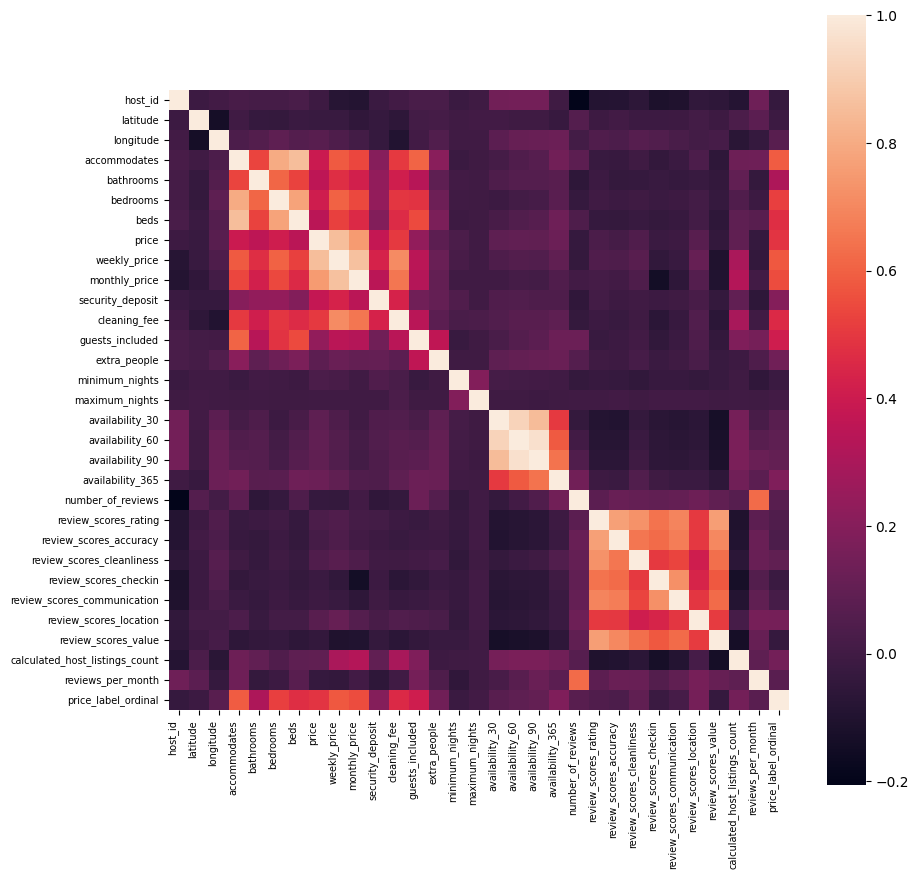

In [91]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(df.drop("scrape_id", axis=1).select_dtypes(include=['number']).corr())
ax.set_aspect('equal') 
plt.xticks(ha='right', fontsize=7);
plt.yticks(ha='right', fontsize=7);

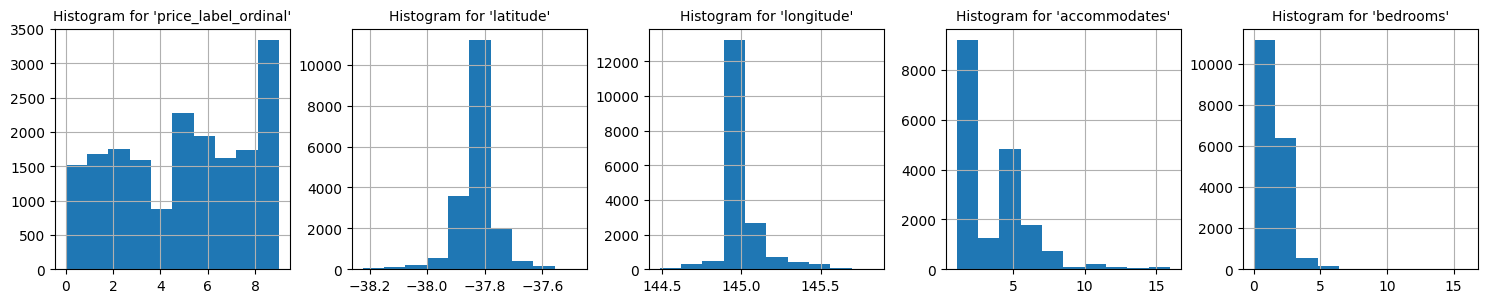

In [97]:
cols_for_hist = ["price_label_ordinal", "latitude", "longitude", "accommodates", "bedrooms"]

fig, ax = plt.subplots(1, len(cols_for_hist), figsize=(15,3))
plt.tight_layout()

for subplot_ax, col in zip(ax, cols_for_hist):
    df[col].hist(ax=subplot_ax)
    subplot_ax.set_title(f"Histogram for '{col}'", size=10);

plt.savefig("../Report/report_images/airbnb_sample_hist.png")